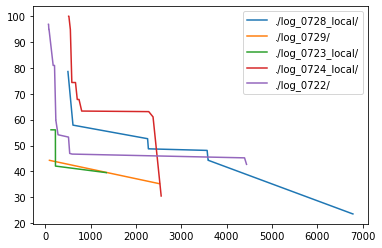

In [1]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re

def get_timestamp(s):
    return datetime.strptime(s.split(" ")[0], '%H:%M:%S.%f')

for log in os.listdir("."):
    if not log.startswith("log"):
        continue
    dir_name = ("./" + log + "/") 
    log_file = dir_name + os.listdir(dir_name)[1]
    with open(log_file) as f:
        content = f.read()
    lines = [l for l in content.split("\n") if l.find("solution") != -1]
    start = get_timestamp(content.split("\n")[0])
    time = []
    costs = []
    for i in range(len(lines)):
        line = lines[i]
        cost = re.findall(r' [0-9][0-9].[0-9][0-9][0-9][0-9]', line)
        if not cost:
            continue
            
        if (get_timestamp(line) -start).total_seconds() < 0:
            time.append((get_timestamp(line) -start + timedelta(days=1)).total_seconds())
        else:
            time.append((get_timestamp(line) -start).total_seconds())
        costs.append(float(cost[0].strip()))

    plt.xlabel = "cost"
    plt.plot(time, costs, label = dir_name)
    plt.legend()
    plt.savefig("result.png")

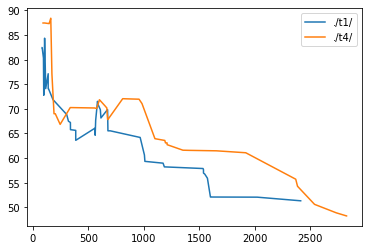

In [66]:
import os 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import re
import numpy as np
from operator import itemgetter

total_trial_number = 10

def get_timestamp(s):
    return datetime.strptime(s.split(" ")[0], '%H:%M:%S.%f')

def parse_log_file(dir_name, log_name):
    log_file = dir_name + log_name
    with open(log_file) as f:
        content = f.read()
    lines = [l for l in content.split("\n") if l.find("solution") != -1]
    start = get_timestamp(content.split("\n")[0])
    time = []
    costs = []
    for i in range(len(lines)):
        line = lines[i]
        cost = re.findall(r' [0-9][0-9].[0-9][0-9][0-9][0-9]', line)
        if not cost:
            continue
            
        if (get_timestamp(line) -start).total_seconds() < 0:
            time.append((get_timestamp(line) -start + timedelta(days=1)).total_seconds())
        else:
            time.append((get_timestamp(line) -start).total_seconds())
        costs.append(float(cost[0].strip()))
    return costs, time 


for log in os.listdir("."):
    if not log.startswith("t"):
        continue
    dir_name = "./" + log +"/"
    l = []
    for log_name in os.listdir(dir_name):
        if not log_name.endswith("0"):
            continue
        costs, times = parse_log_file(dir_name, log_name )
        if not cost: 
            log_name = log_name[:-1] + '1'
            costs, times = parse_log_file(dir_name, log_name)
            if not cost: 
                log_name = log_name[:-1] + '2'
                costs, times = parse_log_file(dir_name, log_name)
                if not cost: 
                    log_name = log_name[:-1] + '3'
                    costs, times = parse_log_file(dir_name, log_name)
        trial_number = int(log_name[8])
        #nthread = int(log_name[18])
        for i in range(len(times)):
            arr = np.empty((total_trial_number,))
            arr[:] = np.NaN
            arr[trial_number] = costs[i]
            l.append([times[i], arr, trial_number])

    l = sorted(l,key=itemgetter(0))
    final_time = []
    final_cost = []
    for i in range(1, len(l)):
        old_arr = l[i-1]
        old_arr[1][l[i][2]] = l[i][1][l[i][2]]
        old_arr[0] = l[i][0]
        old_arr[2] = l[i][2]
        l[i] = old_arr.copy()
        final_time.append(old_arr[0])
        final_cost.append(np.nanmean(old_arr[1]))
        
    plt.plot(final_time, final_cost, label = dir_name)   
    plt.legend()